In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


In [ ]:
Train_data=pd.read_csv("Train_data.csv")
Train_data.head()

le=preprocessing.LabelEncoder()
Train_data['explicit']=le.fit_transform(Train_data['explicit'])
Train_data['mode']=le.fit_transform(Train_data['mode'])
Train_data['popularity'].replace(to_replace=['very high','high','average','low','very low'], value=[5,4,3,2,1], inplace=True)


Y=Train_data["popularity"]
X=Train_data.drop(columns=["release_date","id"],axis=1)
X


,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity
0,0.9490,0.2350,0.0276,0,0.927000,5,0.513,-27.398,0,0.0381,110.838,0.03980,1947,3.0,1
1,0.8550,0.4560,0.4850,0,0.088400,4,0.151,-10.046,0,0.0437,152.066,0.85900,2020,2.4,2
2,0.8270,0.4950,0.4990,0,0.000000,0,0.401,-8.009,1,0.0474,108.004,0.70900,1950,2.6,1
3,0.6540,0.6430,0.4690,0,0.108000,7,0.218,-15.917,0,0.0368,83.636,0.96400,1974,2.4,2
4,0.7380,0.7050,0.3110,0,0.000000,5,0.322,-12.344,0,0.0488,117.260,0.78500,1973,3.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,0.0408,0.8090,0.8010,0,0.000000,1,0.353,-5.461,0,0.4070,81.940,0.74400,2014,3.4,3
12223,0.9120,0.4510,0.2400,0,0.000002,1,0.175,-14.014,0,0.0351,134.009,0.70100,1959,2.0,5
12224,0.3280,0.5510,0.5640,0,0.002950,2,0.352,-9.298,1,0.0338,124.883,0.89000,1984,2.5,2
12225,0.1220,0.0608,0.9390,0,0.991000,1,0.912,-26.324,0,0.1180,73.234,0.00558,2017,3.1,4


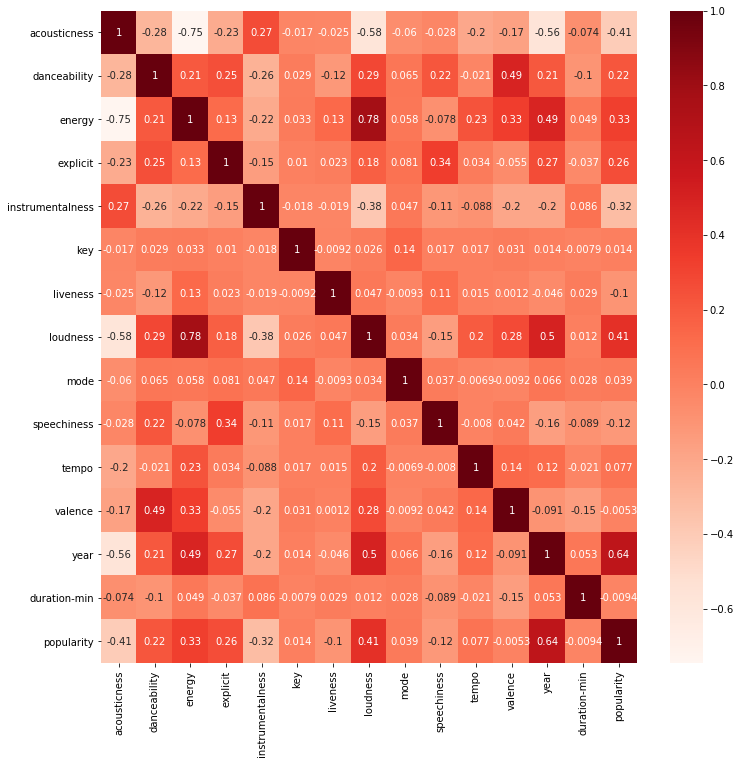

In [ ]:
#co-relation and visualization
plt.figure(figsize=(12,12))
cor=X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_popularity=abs(cor['popularity'])
print(cor_popularity)

acousticness        0.407964
danceability        0.220554
energy              0.327218
explicit            0.260153
instrumentalness    0.317268
key                 0.014269
liveness            0.103116
loudness            0.413219
mode                0.039218
speechiness         0.122614
tempo               0.076751
valence             0.005329
year                0.635493
duration-min        0.009381
popularity          1.000000
Name: popularity, dtype: float64


In [ ]:
#feature_normalization

features_to_normalize=['loudness','tempo','duration-min','year']
Scaler=preprocessing.MinMaxScaler()

for column in features_to_normalize:
    col_transformed=Scaler.fit_transform(X[column].values.reshape(-1, 1))
    X[column]=col_transformed
X=X.drop("popularity",axis=1)
X



,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min
0,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,0,0.0381,0.511144,0.03980,0.267327,0.038567
1,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,0,0.0437,0.701272,0.85900,0.990099,0.030303
2,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,1,0.0474,0.498075,0.70900,0.297030,0.033058
3,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,0,0.0368,0.385698,0.96400,0.534653,0.030303
4,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,0,0.0488,0.540760,0.78500,0.524752,0.044077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,0,0.4070,0.377877,0.74400,0.930693,0.044077
12223,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,0,0.0351,0.618000,0.70100,0.386139,0.024793
12224,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,1,0.0338,0.575914,0.89000,0.633663,0.031680
12225,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,0,0.1180,0.337728,0.00558,0.960396,0.039945


In [ ]:
#feature selection


In [ ]:
#splitting of data in train and CV set
X_train,X_CV,Y_train,Y_CV=train_test_split(X,Y,test_size=0.1,random_state=42)


In [ ]:
#DecisionTree classifier

dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, Y_train) 
dtree_predictions = dtree_model.predict(X_CV)

cm = confusion_matrix(Y_CV, dtree_predictions)

dtree_predictions=np.transpose(dtree_predictions)

count=0
dtree_predictions=list(dtree_predictions)
Y_CV=list(Y_CV)
for i in range (len(dtree_predictions)):
  if (dtree_predictions[i]==Y_CV[i]) :
   count=count+1;




accuracy=count/len(dtree_predictions)

print("Accuracy of model:",accuracy)

Accuracy of model: 0.6083401471790678


In [ ]:
#one vs rest multiclass classification


OVR_Model = LogisticRegression(multi_class='ovr',max_iter=1000)
# fit model
OVR_Model.fit(X_train, Y_train)
# make predictions
Y_OVRmodel = OVR_Model.predict(X_CV)

count1=0
for i in range (len(Y_CV)):
  if (Y_OVRmodel[i]==Y_CV[i]) :
   count1=count1+1;

accuracy=count1/len(Y_CV)

print("Accuracy of model:",accuracy)




Accuracy of model: 0.5053147996729354


In [ ]:
#finding number of samples in each class
one=two=thr=fo=fi=0
for i in range(len(Y)):
    if Y[i]==1:
        one=one+1
    if Y[i]==2:
        two=two+1
    if Y[i]==3:
        thr=thr+1
    if Y[i]==4:
        fo=fo+1
    if Y[i]==5:
        fi=fi+1
        
print(one,two,thr,fo,fi)



3222 3118 2912 2606 369


In [ ]:
#weighted logistic regression
weights={1:1,2:1,3:1,4:1,5:10}

In [ ]:
def revenue(Y_predicited,money,Y):
  
  revenue=0
  revenue_values={1:2,2:4,3:6,4:8,5:10}

  for i in range(len(Y)):

    if(money==0):
      print("money is spent and revenue is",revenue)
      break
    else:  
      if(Y_predicited[i]==1 and money-1>=0):
        if(Y[i]<=1):
          revenue=revenue+revenue_values[Y[i]]
        money=money-1
      if(Y_predicited[i]==2 and money-2>=0):
        if(Y[i]<=2):
          revenue=revenue+revenue_values[Y[i]]
        money=money-2
      if(Y_predicited[i]==3 and money-3>=0):
        if(Y[i]<=3):
          revenue=revenue+revenue_values[Y[i]]
        money=money-3
      if(Y_predicited[i]==4 and money-4>=0):
        if(Y[i]<=4):
          revenue=revenue+revenue_values[Y[i]]
        money=money-4
      if(Y_predicited[i]==5 and money-5>=0):
        if(Y[i]<=5):
          revenue=revenue+revenue_values[Y[i]]
        money=money-5
      
      
  print("Revenue is",revenue)   

In [ ]:
revenue(dtree_predictions,10000,Y_CV)

Revenue is 3698
